Train, test, and validation sets have been created successfully.
Folder: E:\GitHub\swh_data\20240418_hs\Dent\1cam
Train: 586, Test: 73, Validation: 74
Folder: E:\GitHub\swh_data\20240418_hs\Dent\2cam
Train: 938, Test: 117, Validation: 118
Folder: E:\GitHub\swh_data\20240418_hs\Dent\4cam
Train: 15, Test: 1, Validation: 3
Folder: E:\GitHub\swh_data\20240418_hs\Dent\9cam
Train: 80, Test: 10, Validation: 10
Folder: E:\GitHub\swh_data\20240418_hs\Scartch\8cam
Train: 142, Test: 17, Validation: 19
Folder: E:\GitHub\swh_data\20240418_hs\Uneven\11cam
Train: 1204, Test: 150, Validation: 151
Folder: E:\GitHub\swh_data\20240418_hs\Uneven\3cam
Train: 477, Test: 59, Validation: 61
Folder: E:\GitHub\swh_data\20240418_hs\Uneven\5cam
Train: 1090, Test: 136, Validation: 137


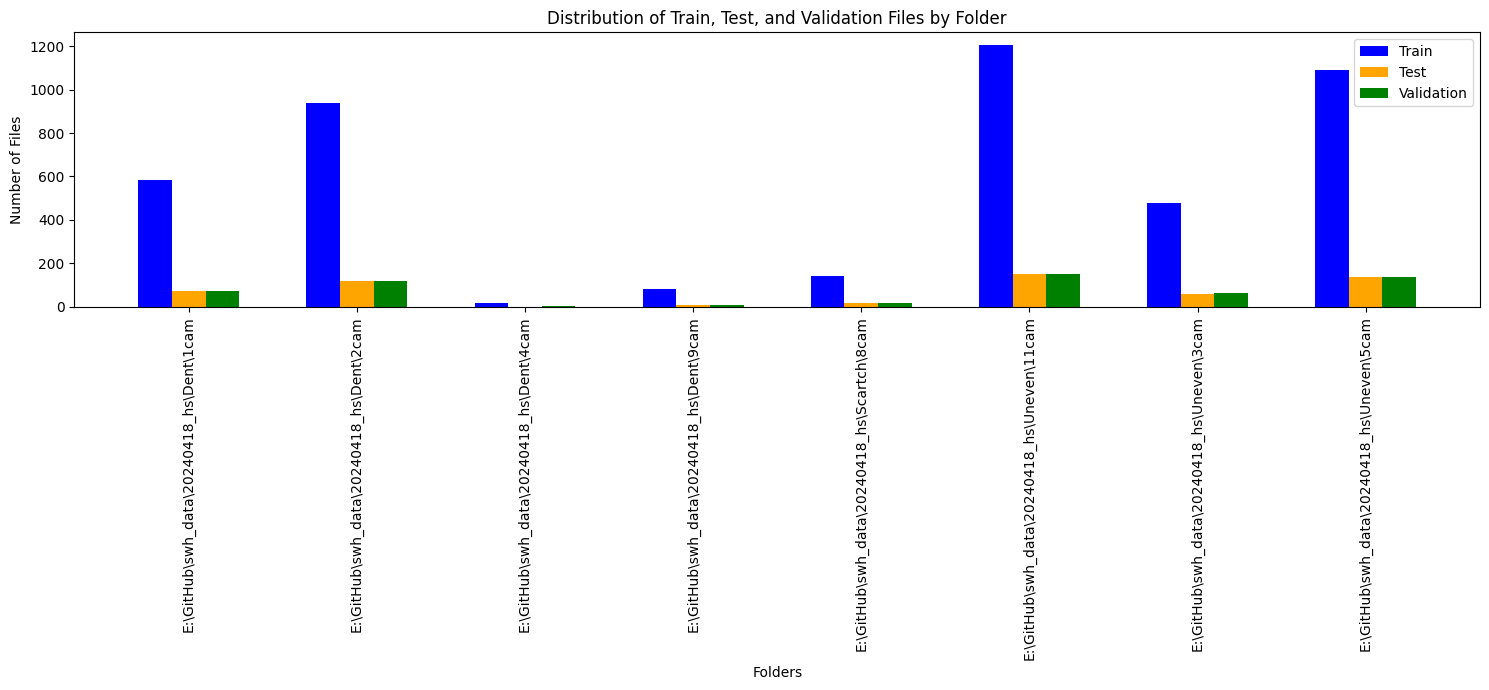

In [6]:
import os
import glob
import random
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Collect all image files (.jpg, .jpeg, .png) // 모든 이미지 파일(.jpg, .jpeg, .png) 수집
base_path = r"E:\GitHub\swh_data\20240418_hs"
image_extensions = ["*.jpg", "*.jpeg", "*.png"]
files = []
for extension in image_extensions:
    files.extend(glob.glob(os.path.join(base_path, "**", extension), recursive=True))

# Group files by their parent directory // 파일을 부모 디렉토리 별로 그룹화
files_by_dir = {}
for file_path in files:
    parent_dir = os.path.dirname(file_path)
    if parent_dir not in files_by_dir:
        files_by_dir[parent_dir] = []
    files_by_dir[parent_dir].append(file_path)

# Prepare train, test, val file paths // 파일 경로 준비
train_output_path = os.path.join(base_path, "train.txt")
test_output_path = os.path.join(base_path, "test.txt")
validation_output_path = os.path.join(base_path, "validation.txt")

# Initialize lists to hold file paths for each set //  각 세트에 대한 파일 경로를 보관할 리스트 초기화
train_files = []
test_files = []
validation_files = []

# Data for visualization // 시각화를 위한 데이터
data_for_viz = []

# Distribute files into train, test, and validation sets // 파일들을 train, test, validation 세트로 분할
for parent_dir, file_paths in files_by_dir.items():
    if len(file_paths) >= 10:
        random.shuffle(file_paths)
        num_train = int(len(file_paths) * 0.8)
        num_test = int(len(file_paths) * 0.1)
        num_val = len(file_paths) - num_train - num_test

        train_files.extend(file_paths[:num_train])
        test_files.extend(file_paths[num_train:num_train + num_test])
        validation_files.extend(file_paths[num_train + num_test:])

        data_for_viz.append((parent_dir, num_train, num_test, num_val))
    else:
        train_files.extend(file_paths)
        data_for_viz.append((parent_dir, len(file_paths), 0, 0))

# Shuffle the overall lists to ensure randomness // 전체 리스트를 랜덤 라이브러리 이용해서 섞음
random.shuffle(train_files)
random.shuffle(test_files)
random.shuffle(validation_files)

# Adjust the sets to ensure the overall 8:1:1 ratio // 전체적으로 8:1:1 비율을 유지하도록 세트 조정
total_files = len(train_files) + len(test_files) + len(validation_files)
desired_train_count = int(total_files * 0.8)
desired_test_count = int(total_files * 0.1)
desired_val_count = total_files - desired_train_count - desired_test_count

# Adjust train set // train 세트 조정
if len(train_files) > desired_train_count:
    extra_files = train_files[desired_train_count:]
    train_files = train_files[:desired_train_count]
    random.shuffle(extra_files)
    test_files.extend(extra_files[:desired_test_count - len(test_files)])
    validation_files.extend(extra_files[desired_test_count - len(test_files):])
else:
    shortfall = desired_train_count - len(train_files)
    if len(test_files) > shortfall:
        train_files.extend(test_files[:shortfall])
        test_files = test_files[shortfall:]
    else:
        train_files.extend(test_files)
        train_files.extend(validation_files[:shortfall - len(test_files)])
        validation_files = validation_files[shortfall - len(test_files):]

# Adjust test set // test 세트 조정
if len(test_files) > desired_test_count:
    extra_files = test_files[desired_test_count:]
    test_files = test_files[:desired_test_count]
    validation_files.extend(extra_files)
else:
    shortfall = desired_test_count - len(test_files)
    if len(validation_files) > shortfall:
        test_files.extend(validation_files[:shortfall])
        validation_files = validation_files[shortfall:]

# Write file paths to respective files // 각 세트에 대한 파일 경로를 텍스트 파일에 씀
with open(train_output_path, 'w') as f:
    for file_path in train_files:
        f.write(file_path + '\n')

with open(test_output_path, 'w') as f:
    for file_path in test_files:
        f.write(file_path + '\n')

with open(validation_output_path, 'w') as f:
    for file_path in validation_files:
        f.write(file_path + '\n')

print("Train, test, and validation sets have been created successfully.")

# Print the distribution counts // 분포 카운트를 출력
for folder, train_count, test_count, val_count in data_for_viz:
    print(f"Folder: {folder}")
    print(f"Train: {train_count}, Test: {test_count}, Validation: {val_count}")

# Visualization // 시각화
folders = [x[0] for x in data_for_viz]
train_counts = [x[1] for x in data_for_viz]
test_counts = [x[2] for x in data_for_viz]
val_counts = [x[3] for x in data_for_viz]

x = np.arange(len(folders))
width = 0.2

fig, ax = plt.subplots(figsize=(15, 7))
bar1 = ax.bar(x - width, train_counts, width, label='Train', color='blue')
bar2 = ax.bar(x, test_counts, width, label='Test', color='orange')
bar3 = ax.bar(x + width, val_counts, width, label='Validation', color='green')

ax.set_xlabel('Folders')
ax.set_ylabel('Number of Files')
ax.set_title('Distribution of Train, Test, and Validation Files by Folder')
ax.set_xticks(x)
ax.set_xticklabels(folders, rotation='vertical')
ax.legend()

plt.tight_layout()
plt.show()
